In [1]:
import pandas as pd
from ipynb.fs.full.utils import custom_groupby, get_df, replace_values_by_condition
from ipynb.fs.full.plots import pie_chart

In [2]:
# get formatted and ready to use dataframe
df = get_df()

In [3]:
df.head(10)

,ID,Status,Duration,D1_Undergraduation,D1_Specialization,D1_Master,D1_Phd,D1_Courses,D1_Others,D2_Country,...,Q4_ML_Life_Cycle_Main_Problems_Model_Monitoring_Free_Third,Q4_ML_Life_Cycle_Main_Problems_Model_Other_Free_First,Q4_ML_Life_Cycle_Main_Problems_Model_Other_Free_Second,Q4_ML_Life_Cycle_Main_Problems_Model_Other_Free_Third,Q5_ML_Life_Cycle_Main_Problems_Ranking_Free_First,Q5_ML_Life_Cycle_Main_Problems_Ranking_Free_Second,Q5_ML_Life_Cycle_Main_Problems_Ranking_Free_Third,Q6_ML_Solution_Optimality,Q7_ML_Solution_Optimality_Extra_Effort,Origin
2,31,Completed (31),1317,Economics,-99,M.Sc. in Economics,-99,Data Scientist in Datacamp,-99,Brazil,...,Feeding the model in appropriate way,-99,-99,-99,Problems with data collection and cleaning,Others tasks which competes the time,Search the appropriate methodology,Frequently,70,https://ww2.unipark.de/uc/seml/
3,34,Completed (31),854,-99,Management,No,No,No,No,Brazil,...,-99,-99,-99,-99,-99,-99,-99,Never,-77,-99
4,36,Completed (31),1593,Mathematics,Informatics,MSC Computer Science,PhD computer Science,Vários cursos in Coursera,-99,Brazil,...,-99,-99,-99,-99,Data preparation,Prediction Task identification,Selecionar of learning algo,Sometimes,30,-99
5,57,Completed (31),4238,Computer Science,Data science specialization,-99,-99,-99,-99,Germany,...,-99,-99,-99,-99,-99,-99,-99,Sometimes,50,-99
6,46,Completed (31),2821,Actuarial Science,Post Graduation in Data Science,M Sc in Data Science -ML models,no Ph D,no other certifications,-99,Brazil,...,-99,-99,-99,-99,understand the pain and identify if ML is real...,we need to cut or we need to cluster some kind...,present and discuss metrics and distribution o...,Sometimes,20,-99
7,53,Completed (31),2097,Information System,-99,M.Sc. in Applied Informatics,-99,-99,-99,Brazil,...,-99,-99,-99,-99,insufficient amount of data,apply the models,Not knowing how to deploy,Sometimes,50,-99
8,58,Completed (31),1696,Computer Science,-99,Computer Science,-99,Microsoft Professional Program Data Science & ...,-99,Germany,...,-99,-99,-99,-99,Data Availability,Sufficient Data Quantity,Deployment Costs for non-trivial ML projects,Sometimes,30,https://t.co/
9,64,Completed (31),1250,Electrical and Electronics Engineering,-99,M.Sc. in AI and Software Engineering,Computer science,"Azure Associate AI Engineer, Azure Data Scienc...",-99,Sweden,...,-99,-99,-99,-99,"Basic: no proper engagement from management, n...",Understand the context,-99,Sometimes,50,https://www.linkedin.com/
10,65,Completed (31),106,-99,-99,-99,-99,-99,-99,0,...,-99,-99,-99,-99,-99,-99,-99,Never,-77,-99
11,69,Completed (31),79,-99,-99,-99,-99,-99,-99,0,...,-99,-99,-99,-99,-99,-99,-99,Never,-77,https://ww2.unipark.de/uc/seml/


In [4]:
df[['Q3_ML_Life_Cycle_Effort_Problem_Understanding', 'Q3_ML_Life_Cycle_Effort_Data_Collection',
'Q3_ML_Life_Cycle_Effort_Data_Pre-Processing', 'Q3_ML_Life_Cycle_Effort_Model_Creation', 
'Q3_ML_Life_Cycle_Effort_Model_Evaluation', 'Q3_ML_Life_Cycle_Effort_Model_Deployment',
'Q3_ML_Life_Cycle_Effort_Model_Monitoring']].head()

,Q3_ML_Life_Cycle_Effort_Problem_Understanding,Q3_ML_Life_Cycle_Effort_Data_Collection,Q3_ML_Life_Cycle_Effort_Data_Pre-Processing,Q3_ML_Life_Cycle_Effort_Model_Creation,Q3_ML_Life_Cycle_Effort_Model_Evaluation,Q3_ML_Life_Cycle_Effort_Model_Deployment,Q3_ML_Life_Cycle_Effort_Model_Monitoring
2,5,20,30,25,12,5,3
3,30,12,12,12,12,12,10
4,20,10,15,20,5,15,15
5,30,10,10,25,10,15,0
6,15,10,10,15,15,25,10


In [5]:
# check if there is something unexpected in the columns
# print(df['Q3_ML_Life_Cycle_Effort_Problem_Understanding'].unique())
# print(df['Q3_ML_Life_Cycle_Effort_Data_Collection'].unique())
# print(df['Q3_ML_Life_Cycle_Effort_Data_Pre-Processing'].unique())
# print(df['Q3_ML_Life_Cycle_Effort_Model_Creation'].unique())
# print(df['Q3_ML_Life_Cycle_Effort_Model_Evaluation'].unique())
# print(df['Q3_ML_Life_Cycle_Effort_Model_Deployment'].unique())
# print(df['Q3_ML_Life_Cycle_Effort_Model_Monitoring'].unique())

In [6]:
# two unexpected values appear = -66
# replace them to "-66" value
df = replace_values_by_condition(df, 'Q3_ML_Life_Cycle_Effort_Problem_Understanding', "-66", '0', "eq")
df = replace_values_by_condition(df, 'Q3_ML_Life_Cycle_Effort_Data_Collection', "-66", '0', "eq")
df = replace_values_by_condition(df, 'Q3_ML_Life_Cycle_Effort_Data_Pre-Processing', "-66", '0', "eq")
df = replace_values_by_condition(df, 'Q3_ML_Life_Cycle_Effort_Model_Creation', "-66", '0', "eq")
df = replace_values_by_condition(df, 'Q3_ML_Life_Cycle_Effort_Model_Evaluation', "-66", '0', "eq")
df = replace_values_by_condition(df, 'Q3_ML_Life_Cycle_Effort_Model_Deployment', "-66", '0', "eq")
df = replace_values_by_condition(df, 'Q3_ML_Life_Cycle_Effort_Model_Monitoring', "-66", '0', "eq")

In [7]:
q3_rename_mapping = {
    'Q3_ML_Life_Cycle_Effort_Problem_Understanding': 'Problem Understanding',
    'Q3_ML_Life_Cycle_Effort_Data_Collection': 'Data Collection',
    'Q3_ML_Life_Cycle_Effort_Data_Pre-Processing': 'Data Pre-Processing',
    'Q3_ML_Life_Cycle_Effort_Model_Creation': 'Model Creation',
    'Q3_ML_Life_Cycle_Effort_Model_Evaluation': 'Model Evaluation',
    'Q3_ML_Life_Cycle_Effort_Model_Deployment': 'Model Deployment',
    'Q3_ML_Life_Cycle_Effort_Model_Monitoring': 'Model Monitoring'
}

In [8]:
# convert column to integer - if you read before this line, you will get an string like '14'
df = df.astype({"Q3_ML_Life_Cycle_Effort_Problem_Understanding": int}, errors='raise')
df = df.astype({"Q3_ML_Life_Cycle_Effort_Data_Collection": int}, errors='raise')
df = df.astype({"Q3_ML_Life_Cycle_Effort_Data_Pre-Processing": int}, errors='raise')
df = df.astype({"Q3_ML_Life_Cycle_Effort_Model_Creation": int}, errors='raise')
df = df.astype({"Q3_ML_Life_Cycle_Effort_Model_Evaluation": int}, errors='raise')
df = df.astype({"Q3_ML_Life_Cycle_Effort_Model_Deployment": int}, errors='raise')
df = df.astype({"Q3_ML_Life_Cycle_Effort_Model_Monitoring": int}, errors='raise')

In [9]:
life_cycles = []
median_values = []
for column in q3_rename_mapping:
    life_cycles.append(q3_rename_mapping[column])
    median_values.append(df[column].median())

In [10]:
# normalize to the sum become 100
sum_values = sum(median_values)
normalized_values = [(float(v)/sum_values)* 100 for v in median_values]

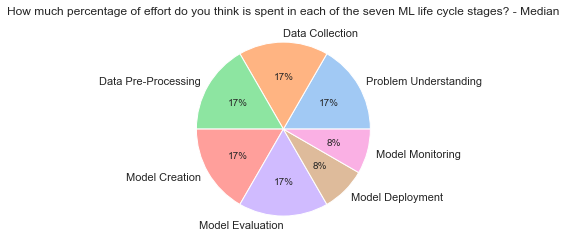

In [11]:
pie_chart(normalized_values, life_cycles, 
          title="How much percentage of effort do you think is spent in each of the seven ML life cycle stages? - Median")

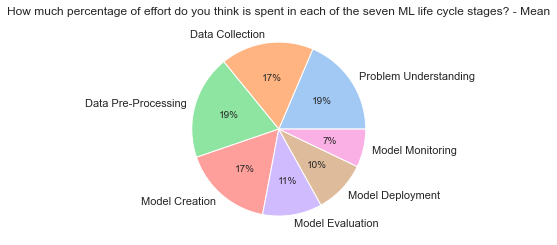

In [12]:
life_cycles = []
mean_values = []
for column in q3_rename_mapping:
    life_cycles.append(q3_rename_mapping[column])
    mean_values.append(df[column].mean())
    
# normalize to the sum become 100
sum_values = sum(mean_values)
normalized_values = [(float(v)/sum_values)* 100 for v in mean_values]

pie_chart(normalized_values, life_cycles, 
          title="How much percentage of effort do you think is spent in each of the seven ML life cycle stages? - Mean")

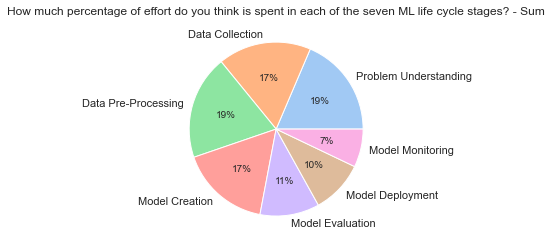

In [13]:
life_cycles = []
sum_ = []
for column in q3_rename_mapping:
    life_cycles.append(q3_rename_mapping[column])
    sum_.append(df[column].sum())
    
# normalize to the sum become 100
sum_values = sum(sum_)
normalized_values = [(float(v)/sum_values)* 100 for v in sum_]

pie_chart(normalized_values, life_cycles, 
          title="How much percentage of effort do you think is spent in each of the seven ML life cycle stages? - Sum")